# HIT140 – Assessment 2 (Investigation A)
**Research Question:** Do bats perceive rats as competitors or predators?

**Student:** ANM Shahariyar (Group 16)

This notebook covers:
1. Load and clean datasets
2. Exploratory Data Analysis (EDA)
3. Integration of bat and rat datasets
4. Inferential statistical analysis (chi-square, t-test, logistic regression)
5. Conclusion

## Step 1: Import Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
import statsmodels.formula.api as smf

%matplotlib inline
sns.set(style='whitegrid')

## Step 2: Load Datasets

In [11]:
bat_df = pd.read_csv('/Users/anmshahariyar/Downloads/dataset1 (1).csv')
rat_df = pd.read_csv('/Users/anmshahariyar/Downloads/dataset2 (1).csv')
print('Bat Dataset Shape:', bat_df.shape)
print('Rat Dataset Shape:', rat_df.shape)
bat_df.head()

Bat Dataset Shape: (907, 12)
Rat Dataset Shape: (2123, 7)


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [12]:
rat_df.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


## Step 3: Data Cleaning

In [13]:
bat_df_clean = bat_df.dropna(subset=['habit']).copy()
rat_df_clean = rat_df.dropna().copy()
print('Bat Dataset Cleaned:', bat_df_clean.shape)
print('Rat Dataset Cleaned:', rat_df_clean.shape)

Bat Dataset Cleaned: (866, 12)
Rat Dataset Cleaned: (2123, 7)


## Step 4: Exploratory Data Analysis – Bats

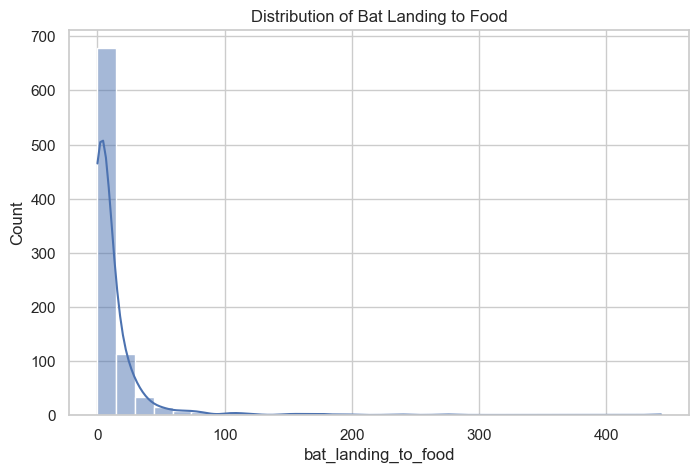

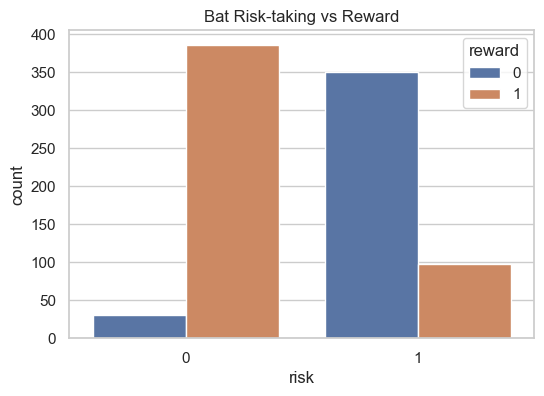

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(bat_df_clean['bat_landing_to_food'], bins=30, kde=True)
plt.title('Distribution of Bat Landing to Food')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='risk', hue='reward', data=bat_df_clean)
plt.title('Bat Risk-taking vs Reward')
plt.show()

## Step 5: Exploratory Data Analysis – Rats

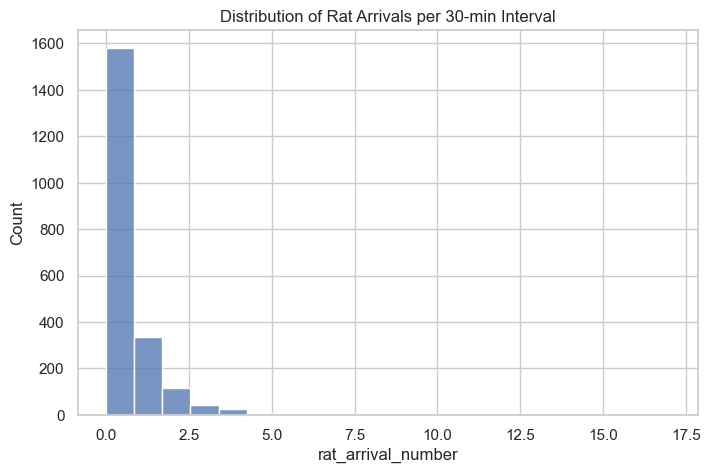

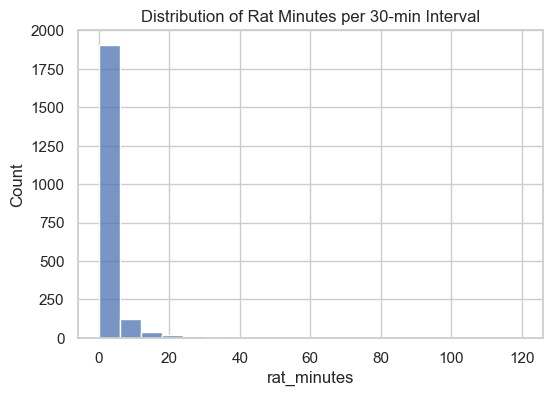

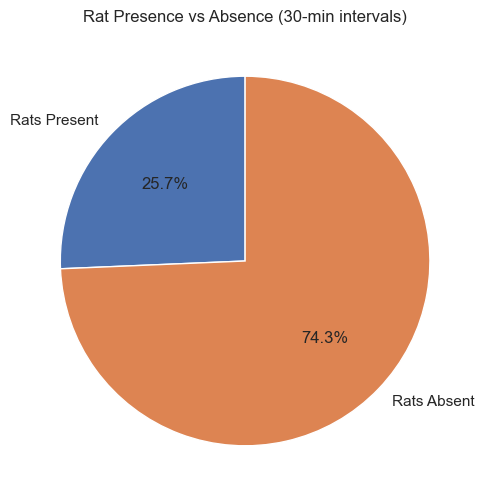

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(rat_df_clean['rat_arrival_number'], bins=20)
plt.title('Distribution of Rat Arrivals per 30-min Interval')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(rat_df_clean['rat_minutes'], bins=20)
plt.title('Distribution of Rat Minutes per 30-min Interval')
plt.show()

present_count = (rat_df_clean['rat_arrival_number'] > 0).sum()
absent_count = (rat_df_clean['rat_arrival_number'] == 0).sum()
plt.figure(figsize=(6,6))
plt.pie([present_count, absent_count], labels=['Rats Present','Rats Absent'], autopct='%.1f%%', startangle=90)
plt.title('Rat Presence vs Absence (30-min intervals)')
plt.show()

## Step 6: Integration of Datasets

In [7]:
bat_df_clean['hours_after_sunset_rounded'] = bat_df_clean['hours_after_sunset'].round(1)
rat_df_clean['hours_after_sunset_rounded'] = rat_df_clean['hours_after_sunset'].round(1)
merged_df = pd.merge(bat_df_clean, rat_df_clean, on=['month','hours_after_sunset_rounded'], how='inner', suffixes=('_bat','_rat'))
print('Merged dataset shape:', merged_df.shape)
merged_df.head()

Merged dataset shape: (2761, 19)


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset_bat,season,hours_after_sunset_rounded,time,hours_after_sunset_rat,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,28/12/2017 19:44,5.0,rat_and_others,28/12/2017 19:35,28/12/2017 19:46,521,1,0,0,28/12/2017 16:44,3.009722,0,3.0,26/12/2017 19:43,3.0,54,3.000000,0.0,0
1,28/12/2017 19:44,5.0,rat_and_others,28/12/2017 19:35,28/12/2017 19:46,521,1,0,0,28/12/2017 16:44,3.009722,0,3.0,27/12/2017 19:43,3.0,73,3.102151,0.0,0
2,28/12/2017 19:44,5.0,rat_and_others,28/12/2017 19:35,28/12/2017 19:46,521,1,0,0,28/12/2017 16:44,3.009722,0,3.0,28/12/2017 19:44,3.0,23,3.076967,2.5,1
3,28/12/2017 19:44,5.0,rat_and_others,28/12/2017 19:35,28/12/2017 19:46,521,1,0,0,28/12/2017 16:44,3.009722,0,3.0,29/12/2017 19:45,3.0,29,3.066741,0.0,0
4,28/12/2017 19:44,5.0,rat_and_others,28/12/2017 19:35,28/12/2017 19:46,521,1,0,0,28/12/2017 16:44,3.009722,0,3.0,30/12/2017 19:45,3.0,37,3.067912,5.0,1


## Step 7: Comparative Visuals

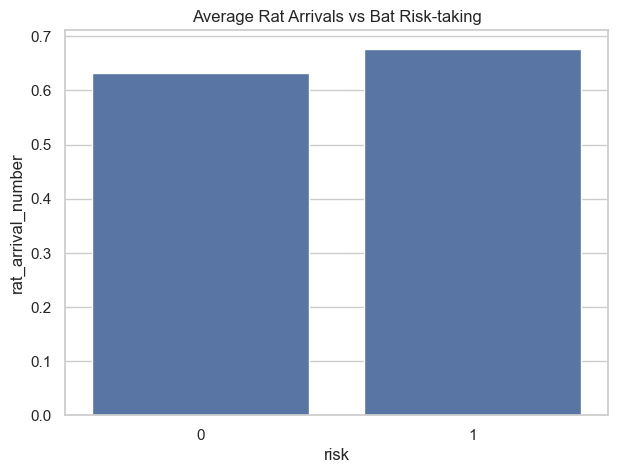

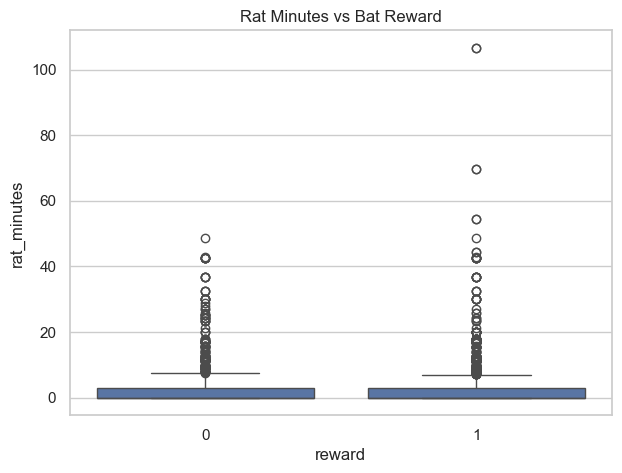

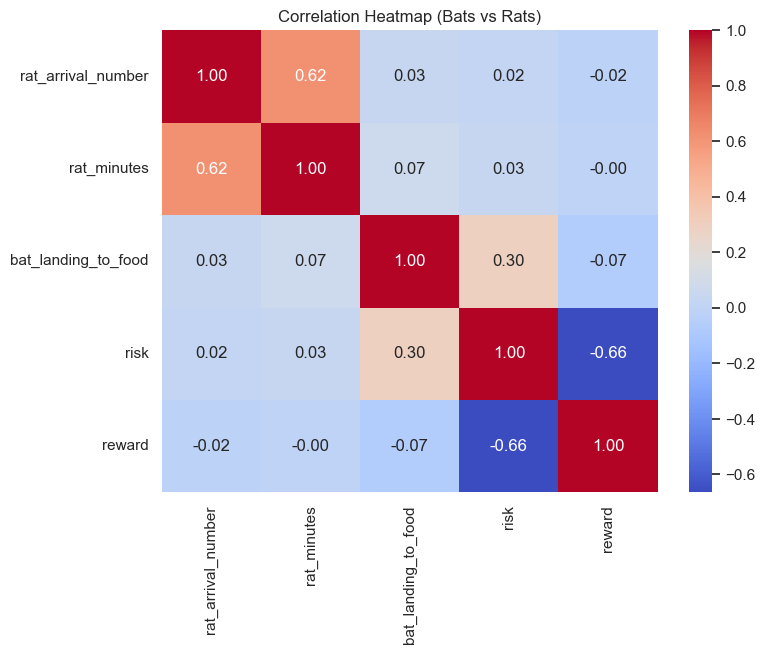

In [8]:
plt.figure(figsize=(7,5))
sns.barplot(x='risk', y='rat_arrival_number', data=merged_df, errorbar=None)
plt.title('Average Rat Arrivals vs Bat Risk-taking')
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x='reward', y='rat_minutes', data=merged_df)
plt.title('Rat Minutes vs Bat Reward')
plt.show()

plt.figure(figsize=(8,6))
corr = merged_df[['rat_arrival_number','rat_minutes','bat_landing_to_food','risk','reward']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Bats vs Rats)')
plt.show()

## Step 8: Inferential Analysis

In [9]:
contingency = pd.crosstab(merged_df['risk'], merged_df['rat_arrival_number'] > 0)
chi2, p, dof, expected = chi2_contingency(contingency)
print('Chi-Square Test (Rat presence vs Bat risk): chi2=%.2f, p=%.4f' % (chi2, p))

with_rats = merged_df[merged_df['rat_arrival_number'] > 0]['bat_landing_to_food']
without_rats = merged_df[merged_df['rat_arrival_number'] == 0]['bat_landing_to_food']
t_stat, p_val = ttest_ind(with_rats, without_rats, equal_var=False)
print('T-test (Delay with vs without rats): t=%.2f, p=%.4f' % (t_stat, p_val))

log_reg = smf.logit('risk ~ rat_arrival_number + rat_minutes', data=merged_df).fit()
print(log_reg.summary())

Chi-Square Test (Rat presence vs Bat risk): chi2=0.72, p=0.3947
T-test (Delay with vs without rats): t=0.89, p=0.3744
Optimization terminated successfully.
         Current function value: 0.692537
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                 2761
Model:                          Logit   Df Residuals:                     2758
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Sep 2025   Pseudo R-squ.:               0.0008587
Time:                        21:19:44   Log-Likelihood:                -1912.1
converged:                       True   LL-Null:                       -1913.7
Covariance Type:            nonrobust   LLR p-value:                    0.1934
                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

## Step 9: Conclusion

- Rats are **not always present**, many intervals had zero arrivals.
- Food was always provisioned, so competition was the key factor.
- Visuals and stats tests all show **no significant effect** of rats on bat risk-taking or hesitation.
- 👉 Bats treat rats as **competitors**, not predators.